# Multi-layer Perceptron

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

# Load tips dataset
tips = sns.load_dataset('tips')

# Preprocessing
# Converting categorical variables to dummy variables
tips = pd.get_dummies(tips, drop_first=True)

# Selecting features and target (predicting 'tip' based on other features)
X = tips.drop('tip', axis=1)
y = tips['tip']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss


Epoch 1/100
7/7 [==============================] - 2s 8ms/step - loss: 10.0907
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 8.3863
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 6.8671
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 5.5013
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 4.2454
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 3.1191
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 2.2529
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 1.7712
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 1.4737
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 1.3730
Epoch 11/100
7/7 [==============================] - 0s 7ms/step - loss: 1.3315
Epoch 12/100
7/7 [==============================] - 0s 7ms/step - loss: 1.2717
Epoch 13/100
7/7 [==============================] - 0s 5ms/s

1.0786150693893433

2024-01-06 03:04:55.134671: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-06 03:04:55.385981: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


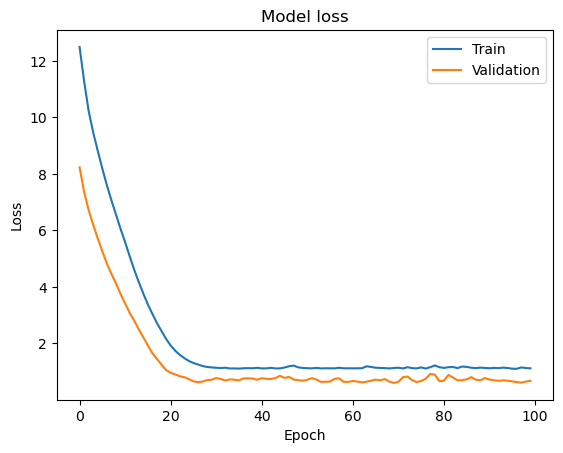

In [8]:
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model and plot the training and testing loss and accuracy at each epoc
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 11.5110

2024-01-06 03:05:07.990250: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 31ms/step - loss: 11.5110 - val_loss: 8.2121
Epoch 2/100
7/7 [==============================] - 0s 12ms/step - loss: 10.6384 - val_loss: 7.5021
Epoch 3/100
1/7 [===>..........................] - ETA: 0s - loss: 10.4366

2024-01-06 03:05:08.247630: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 12ms/step - loss: 9.8629 - val_loss: 6.8207
Epoch 4/100
7/7 [==============================] - 0s 16ms/step - loss: 9.1082 - val_loss: 6.2235
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 8.4334 - val_loss: 5.6233
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 7.7784 - val_loss: 5.1028
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 7.2085 - val_loss: 4.5846
Epoch 8/100
7/7 [==============================] - 0s 11ms/step - loss: 6.6276 - val_loss: 4.0726
Epoch 9/100
7/7 [==============================] - 0s 11ms/step - loss: 6.0906 - val_loss: 3.6295
Epoch 10/100
7/7 [==============================] - 0s 11ms/step - loss: 5.5251 - val_loss: 3.2095
Epoch 11/100
7/7 [==============================] - 0s 11ms/step - loss: 5.0224 - val_loss: 2.8184
Epoch 12/100
7/7 [==============================] - 0s 11ms/step - loss: 4.5161 - val_loss: 2.4466
Epoch 13/100
7/7 [===========

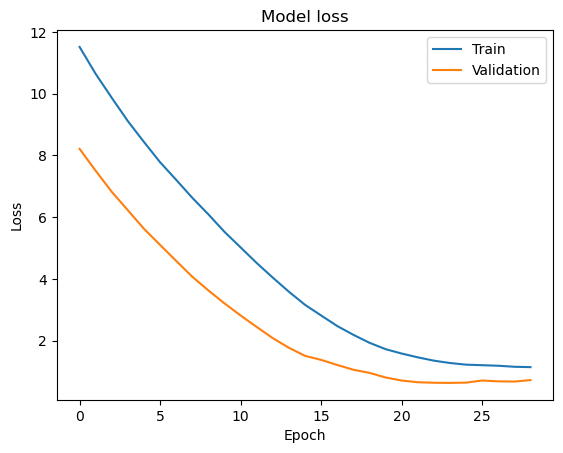

In [9]:
from tensorflow.keras.callbacks import EarlyStopping
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define the callback function
early_stopping = EarlyStopping(patience=5)

# Train the model with the callback function
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

